# Pattern Recognition

1. FEATURE EXTRACTION & DIMENSIONALITY REDUCTION: Principal Component Analysis, Independent Component Analysis (2 hours)
2. DATA CLUSTERING: K-means, Hierarchical clustering, Gaussian Mixture Models (4 hours)



## 1. FEATURE EXTRACTION AND DIMENSIONALITY REDUCTION

### 1.1 PRINCIPAL COMPONENT ANALYSIS (PCA)
Pytnon implementation (sklearn):
https://scikit-learn.org/stable/modules/decomposition.html#pca







Linear coordinate transformation in which the new axis correspond to the directions in which the data presents more dispersion. The procedure is the following:

- $A$: data matrix of size $mxn$ (m observations x n variables).
- Demean the data: $(A-\bar{A})$.
- Obtain the $n \times n$ covariance matrix of the data: $C = (A-\bar{A})^T(A-\bar{A})$.
- Diagonalize C: $C \cdot \vec{v}_i = \lambda_i \vec{v}_i, i = 1,\dots,n$. Eigenvectors $\vec{v}_i$ correspond to the coordinates of the PCA space. Eigenvalues $\lambda_i$ correspond to variance of the original data explained by each component. 
- Variance explained by the principal component $\vec{v}_i$ is: $\frac{\lambda_i}{\sum_i^n\lambda_i}$
- Project data into the new PCA space. Projection into the ith component: $P_i = A \cdot \vec{v}_i$


Slide6.png![image.png](attachment:image.png)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


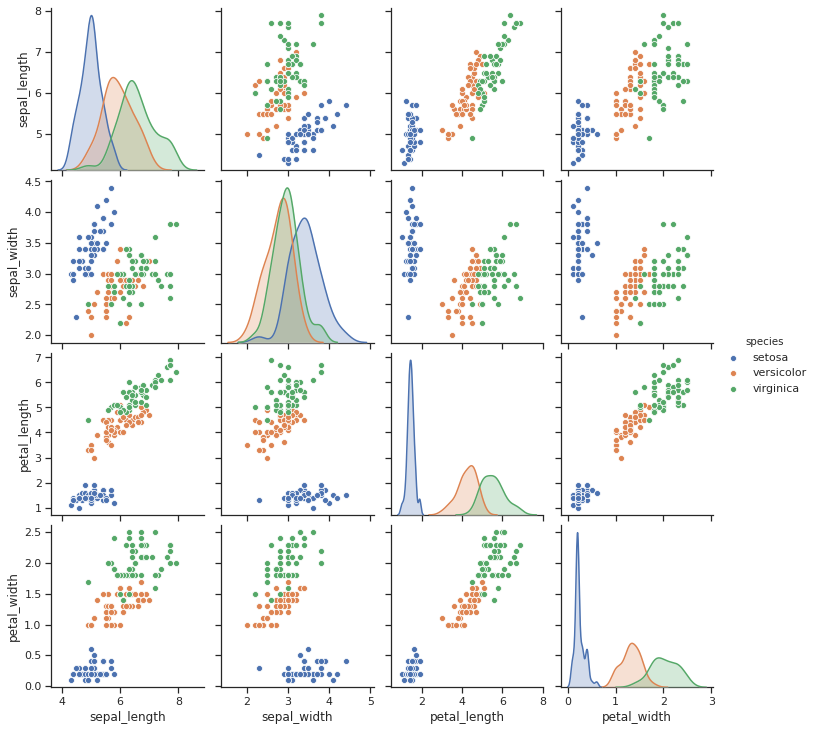

In [1]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

In [0]:
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

We should standardize the data before proceeding:

In [0]:
XS = (X-X.mean(axis=0))/X.std(axis=0)

# it's equivalent to: 

from sklearn.preprocessing import StandardScaler
XS1 = StandardScaler().fit_transform(X)

# check it:
print('Both ways are equivalent: {}'.format((XS-XS1).sum()))

Both ways are equivalent: 0.0


In [0]:
import numpy as np
from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

XS = (X-X.mean(axis=0))/X.std(axis=0)

pca = decomposition.PCA(n_components=4,whiten=False).fit(XS)
Xproj = pca.transform(XS)

**PCA Eigenvalues and eigenvectors:**

In [0]:
print('Eigenvalues = {} {} {} {}'.format(*pca.explained_variance_))
print('Eigenvectors = {} {} {} {}'.format(*pca.components_))

Eigenvalues = 2.9380850501999953 0.9201649041624879 0.14774182104494815 0.02085386217646228
Eigenvectors = [ 0.52106591 -0.26934744  0.5804131   0.56485654] [0.37741762 0.92329566 0.02449161 0.06694199] [-0.71956635  0.24438178  0.14212637  0.63427274] [-0.26128628  0.12350962  0.80144925 -0.52359713]


In [0]:
100*pca.explained_variance_ratio_.cumsum()
# same as:
100*pca.explained_variance_.cumsum()/pca.explained_variance_.sum()

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

Reproduce results by diagonalization of the data covariance matrix ($d \times d$ dimensions, d: number of features):


In [0]:
A = np.cov(XS.T)
print(A.shape)
print(A)

(4, 4)
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [0]:
A1 = np.dot(XS.T,XS)/(XS.shape[0]-1)
print(A.shape)
print(A1)

(4, 4)
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [0]:
from numpy import linalg
val,vec = linalg.eig(A)
print('eval = {}'.format(val))
print('evec = {}'.format(vec))

#U,S,Vt = linalg.svd(A)

eval = [2.93808505 0.9201649  0.14774182 0.02085386]
evec = [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Projection of the original 4D data to the 2D PCA space, since the two principal components with largest eigenvalues capture 97% of the variance in the data

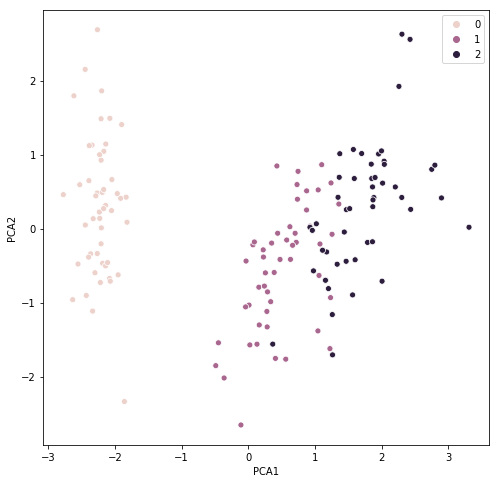

In [0]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()

Represent the directions of the 2 largest eigenvectors: 

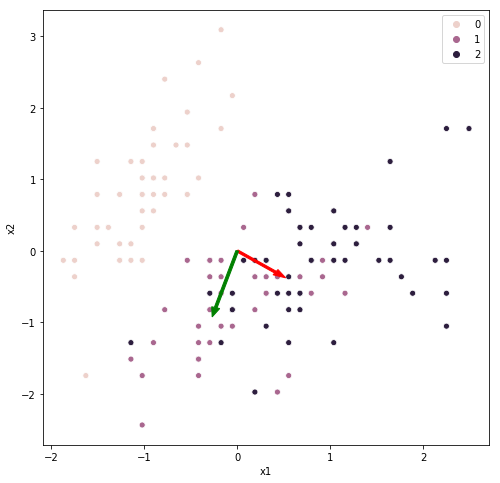

In [0]:
# original data (scaled)
dfpcas = pd.DataFrame(XS[:,0:2],columns=['x1', 'x2'])

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x="x1", y="x2", hue=y,data=dfpcas)
plt.arrow(0,0,vec[0][0],vec[0][1],shape='full',fc='r', ec='r', length_includes_head = True, width=0.03)
plt.arrow(0,0,vec[1][0],vec[1][1],shape='full',fc='g', ec='g', length_includes_head = True, width=0.03)
plt.show()

Check that eigenvectors are indeed orthogonal:

In [0]:
np.dot(vec[0],vec[1])

-1.1102230246251565e-16

Importance of scaling in PCA

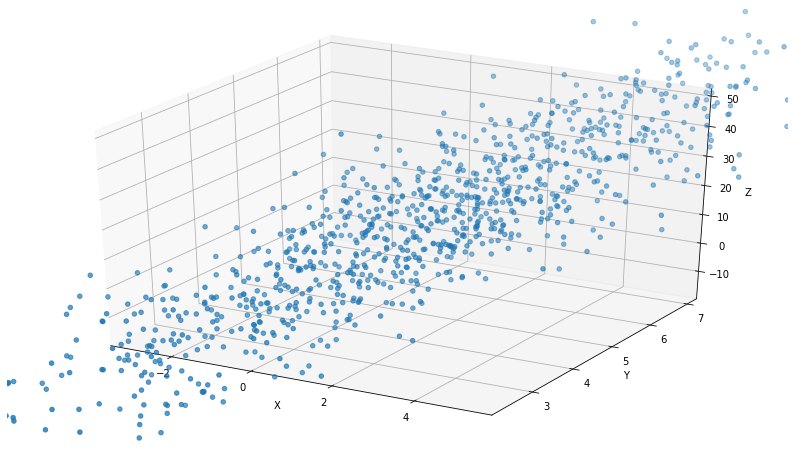

PCA without scaling: [0.743 0.237 0.021]
PCA with scaling: [0.399 0.332 0.269]


In [0]:
from numpy import *
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
set_printoptions(precision = 3)

# Datos: distribución normal multivariada en 3d con diferentes std en cada dirección
mean = [1,5,10]
cov = [[2,-1,0],[-1,20,-1],[0,-1,60]]
d = random.multivariate_normal(mean,cov,1000)

# ANALISIS PCA:
# Estandarizacion de los datos ( d1 = (d - d.mean(0))/d.std(0) ):
from sklearn import preprocessing
d1 = preprocessing.scale(d)

# representación gráfica de los datos:
fig = plot.figure(1,figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d[:,0],d[:,1],d[:,2])
ax.axis('equal')
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plot.show()

import numpy as np
from sklearn.decomposition import PCA
pca1 = PCA(n_components=3)
pca1.fit(d)
X = pca1.transform(d)
print('PCA without scaling:',format(pca1.explained_variance_ratio_))

pca2 = PCA(n_components=3)
pca2.fit(d1)
X = pca2.transform(d1)
print('PCA with scaling:',format(pca2.explained_variance_ratio_))

If data is not scaled one of the components will account for much of the variance in the data due to the differences in variable ranges. When data presents different units or scales this is something important to be taken into account.

**PCA with artificial data:**

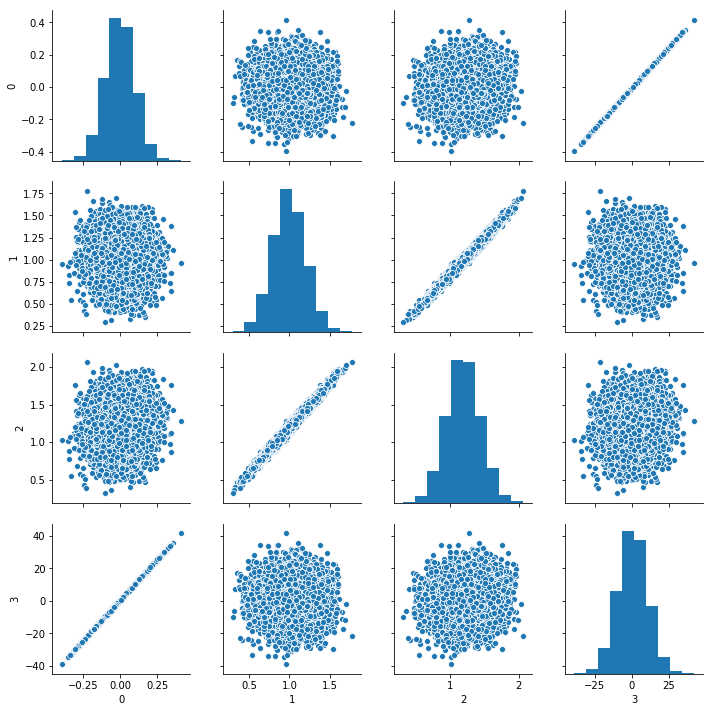

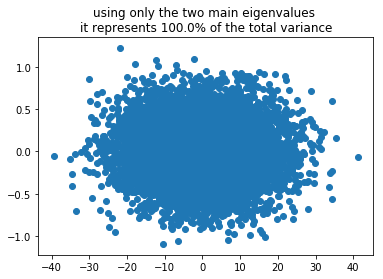

In [0]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import decomposition
from sklearn import datasets

plt.close()
# random vectors x1 and x2

mu1, sigma1 = 0, 0.1
mu2, sigma2 = 1, 0.2

x1 = np.random.normal(mu1, sigma1, 10000)
#plt.plot(x1)
#plt.show()
x2 = np.random.normal(mu2, sigma2, 10000)


# creation of x3 and x4
x3 = 0.3*x1+1.2*x2
x4 = 100*x1+0.4*x2

#x4 = np.abs(x1)**0.5+x2  #yes it's exactly the exemple of the statment


# data matrix
M=np.transpose([x1, x2, x3, x4]) #simply creats the matrix
data=pd.DataFrame(data=M) # and now it transforms it into a usefull data matrix

#scatter matrix
sns.pairplot(data)
# PCA analysis
pca = decomposition.PCA(n_components=2)
pca.fit(data)
data_proj = pca.transform(data)
t=pca.explained_variance_ratio_
plt.figure()
plt.title(str("using only the two main eigenvalues \nit represents "+str(1/100*int(10000*(t[0]+t[1])))+"% of the total variance"))
plt.scatter(data_proj[:,0], data_proj[:,1])
plt.show()


### 1.2 INDEPENDENT COMPONENT ANALYSIS (ICA)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html


- Consider two independent systems A and B that are represented by two time signals $s_A(t)$ and $s_B(t)$.
- The two signals get mixed in a unknown proportion (matrix A, size 2x2). 
- We measure the mixed signals $x_1(t)$ and $x_2(t)$. 

Question: Can we infer the form of the two source signals $s_A(t)$ and $s_B(t)$ only from $x_1(t)$ and $x_2(t)$?.

Answer: Yes, we can {\em if the two systems are statistically independent}. 

How?: Independent Component Analysis (ICA).


<Figure size 432x288 with 0 Axes>

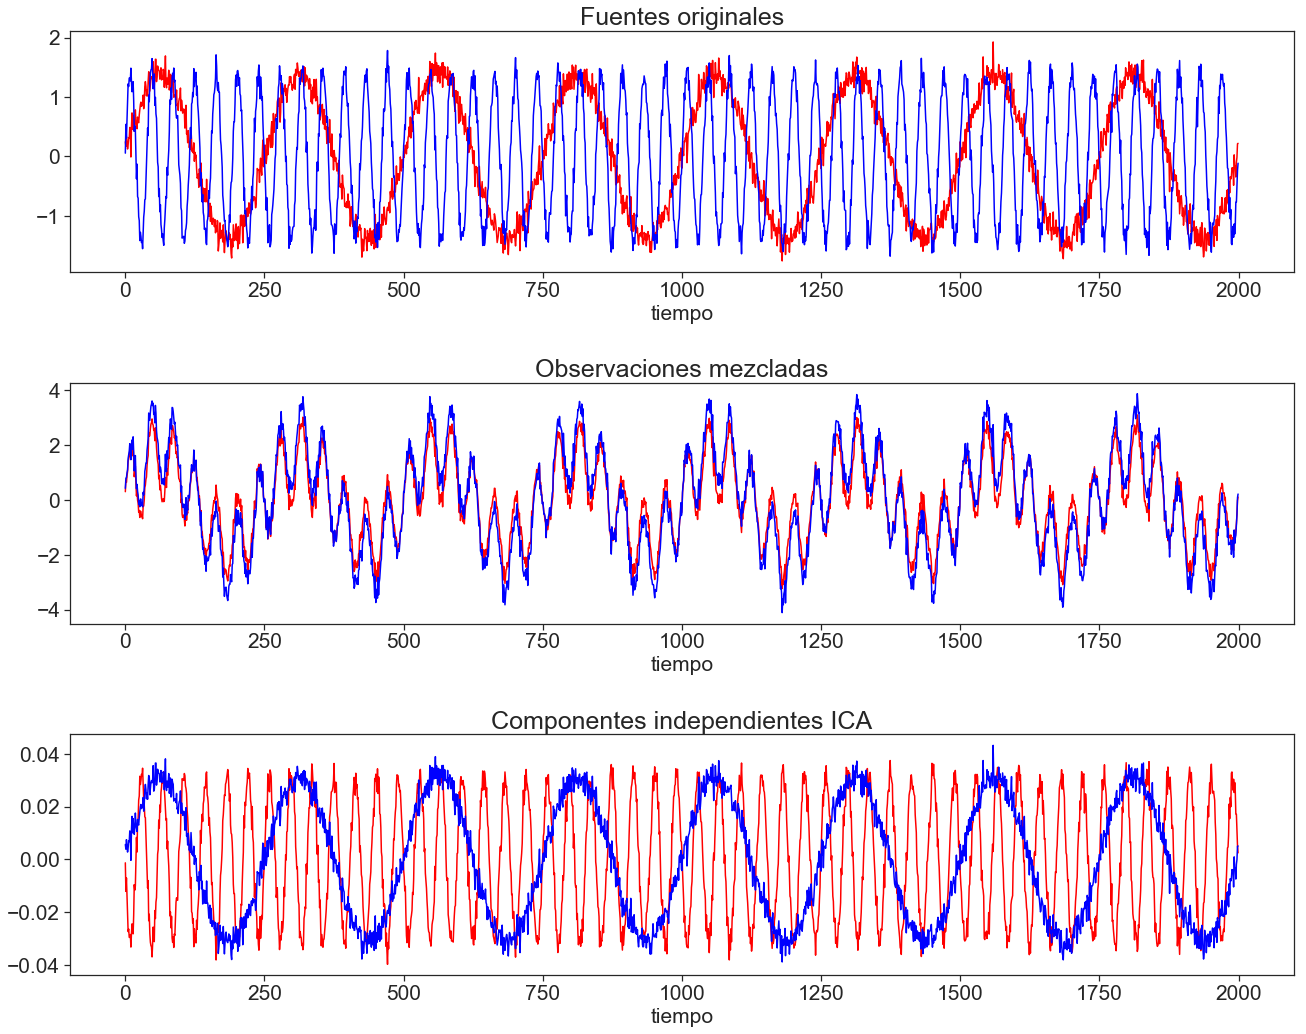

In [0]:
import numpy as np
import pylab as py
import scipy as sc
from sklearn.decomposition import FastICA

# Generar señales sinteticas:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Fuentes originales:
s1 = np.sin(2 *np.pi* time)  # Signal 1 : sinusoidal signal
s2 = np.sin(13 *np.pi* time)  # Signal 1 : sinusoidal signal

S = np.c_[s1, s2]

# Añadir ruido:
S += 0.1 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Estandarizar datos
# Mezclar señales:
A = np.array([[1, 1], [1.5, 1.0]])  # Matriz de mezcla
X = np.dot(S, A.T)  # Observaciones mezcladas

# Descomposicion ICA :
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruccion ICA

# representacion de resultados :
plt.figure()
plt.figure(figsize=(20,20))

models = [S, X, S_]
names = ['Fuentes originales','Observaciones mezcladas',
         'Componentes independientes ICA']
colors = ['red', 'blue', 'green']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name, size=25)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        plt.xlabel('tiempo', fontsize=21) 
        plt.tick_params(labelsize=21)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

### 1.3 FEATURE SELECTION

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

**Correlation heatmap:**

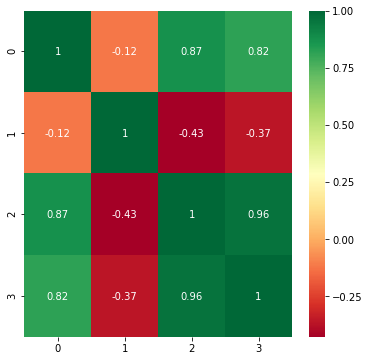

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

data = pd.DataFrame(X)
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**K best feature selector:** 

Select features according to the k highest scores of a certain test: In this example, the method computes chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.


Other methods available as a performance scores:
- f_classif
ANOVA F-value between label/feature for classification tasks.

- mutual_info_classif
Mutual information for a discrete target.

- chi2
Chi-squared stats of non-negative features for classification tasks.

- f_regression
F-value between label/feature for regression tasks.

- mutual_info_regression
Mutual information for a continuous target.

- SelectPercentile
Select features based on percentile of the highest scores.

- SelectFpr
Select features based on a false positive rate test.

- SelectFdr
Select features based on an estimated false discovery rate.

- SelectFwe
Select features based on family-wise error rate.

- GenericUnivariateSelect
Univariate feature selector with configurable mode.

In [0]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

**Recursive Feature Elimination:** Given a set of training features and a classifier, the method recursively evaluates the performance of the method when removing some features and finally provides a reduced set of features that provide minimum loss of performance:

Data shape: (1797, 64)
Removed features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


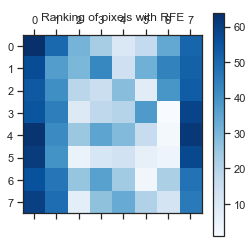

In [0]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
# The database contains 1797 Images of size 8x8 pixels
# Each of the 64 pixels is a feature
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
print('Data shape: {}'.format(X.shape))

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Mantained features: {}'.format(rfe.support_))

# Relevance of each of the pixels represented as a 8x8 image:
# darker pixels at the borders can be discarded since do not improve the classifier's performance during training
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking (the lower, the more relevant the feature)
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

### 1.4. EIGENFACES 
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html


/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


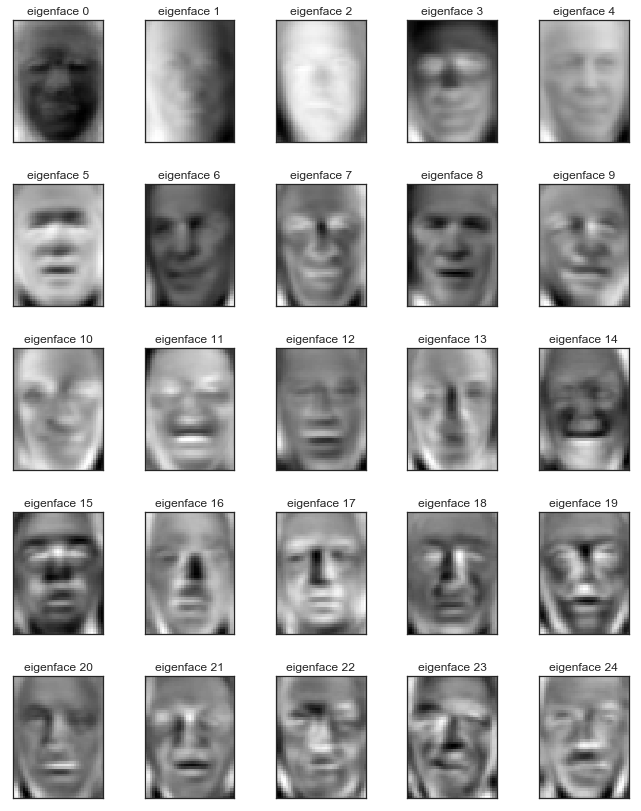

In [0]:
# Cargar librerias necesarias:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Obtener las imágenes de la base de datos:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# ontener numero de imagenes y tamaño:
n_samples, h, w = lfw_people.images.shape

# Cargar los datos:
X = lfw_people.data

# numero de variables del espacio PCA reducido:
n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Representar las eigenfaces más representativas:
n_row=5
n_col=5
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(eigenface_titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
plt.show()